# HyperObjects

**HyperObjects = affine spaces, ellipsoids and polytopes**

Every other *common* objects like points, lines, planes, general vector spaces, spheres, zonotopes, orthotopes and cubes are implemented and usable but under the hood they are in one of the 3 categories.

**Objectives:**
1. Create hyperobjects in any dimension via affine maps
2. Use operators on them (intersection, Minkowski sum when possible)
3. Describe basic properties (dimension, orthogonal complement, volume etc...)
4. Everything is displayable
5. Be super simple to use

### Why only affine spaces, ellipsoids and polytopes?

-> They all can be assimilated to an affine map $\psi\,\colon X \rightarrow Y$ with only the domain $X$ varying between objects:

$$\text{Affine Space } \mathcal{A} = \psi(V) \text{, for $V$ a canonical vector space}$$
$$\text{Ellipsoid } \mathcal{E} = \psi(S) \text{, for $S$ the unit sphere}$$
$$\text{Zonotope } \mathcal{Z} = \psi(C) \text{, for $C$ the unit cube}$$
$$\text{Polytope } \mathcal{P} = \psi(\mathcal{A}\cap C) \text{, for $\mathcal{A}$ an affine space and $C$ the unit cube}$$

Four fundamental subspaces

In [53]:
from hyperobjects import *
import numpy as np

np.random.seed(47)

# 1. Affine Spaces

### Creation Method 1: via predefined constructors

In [54]:
P1 = Point([4,0,0])
A1 = HyperPlane(coefs=[1,0,4,0])
A2 = Plane([[0,1], [0,0], [1,1]], location=[1,1,0])
A3 = Line([1,1,0]) + [-1,0,-1]
A4 = VectorSpace([[1,1,0], [1,0,0], [1,2,2]])

### Creation Method 2: using affine maps

In [55]:
phi1 = AffineMap(A1.generators)
A1 = im(phi1)

A1_normal = ~A1

phi2 = AffineMap([[0,1], [0,0], [1,1]], [1,1,0])
A2 = im(phi2)

phi3 = AffineMap(matrix=[1,1,0], translation=[-1,0,-1])
A3 = im(phi3)

### Attributes and nice functions of affine maps objects

- Generators of $A\longleftrightarrow$ `A.generators`
- Orthonormal basis of $A\longleftrightarrow$ `A.basis`
- Position point of a space $A\longleftrightarrow$ `A.location`
- Dimension $dim(A)\longleftrightarrow$ `dim(A)` or `A.dim`
- Codimension $dim(Y/A) = dim(A^{\bot})\longleftrightarrow$ `codim(A)` or `A.codim`
- Ambient dimension $dim(Y)\longleftrightarrow$ `A.dim_ambient`
- Deep/safe copy $\longleftrightarrow$ `A.copy()`
- Plot $\longleftrightarrow$ `A.plot()`

The most important / useful:
- Containment $B\subset A\longleftrightarrow$ `B in A` or `A.contains(B)`
- $A \cap B \longleftrightarrow$ `A & B` or `A.inter(B)`
- Orthogonal projection of an affine space $B$ (include points!) onto $A$ $\longleftrightarrow$ `A << B` or `A.orthogonal_projector(B)`
- Orthogonal complement $A^{\bot}\longleftrightarrow$ `~A` or `A.orthogonal_complement`

## Display

In [106]:
%matplotlib qt5

fig = plt.figure(figsize=(10,10))
fig.suptitle("Example of affine spaces")
ax = fig.add_subplot(1,1,1, projection="3d")
ax.set_xlim(-3, 3), ax.set_ylim(-3, 3), ax.set_zlim(-3, 3)
ax.set_xlabel("x"), ax.set_ylabel("y"), ax.set_zlabel("z")

P1.plot(ax, color="red", label="Point P1")
A1.plot(ax, color="orange", label="HyperPlane A1", alpha=0.3)
A2.plot(ax, color="red", label="Plane A2", alpha=0.3)
A3.plot(ax, color="blue", label="Line A3", alpha=1, scale=10)

(A1 << P1).plot(ax, color="violet", label="A1 << Point P1")
(~A1).plot(ax, color="orange", label="Normal of A1", scale=40)
(A1 & A2).plot(ax, color="green", label="A1 inter A2", scale=10)
(A2 << (~A1)).plot(ax, color="yellow", label="A2 << ~A1", scale=10)

ax.legend()

## Ellipsoids: Pair points, Circles, Spheres and Ellipsoids

An ellipsoid is an affine mapping of a sphere.
A pair points is sphere of 1 dimension.

### Intersection
Only works with an affine space for now.

In [85]:
S = Sphere(3) # 3D sphere
print("Radius:", S.radius)
print("Dimension:", S.dim)
print("Codimension:", S.codim)
print("Ambient dimension:", S.dim_ambient)
print("S is pair point:", S.is_pair_point())
print("Volume:", S.volume)

# ELLIPSOID = 
E = 2*S + [1,-1,1]
print("Radii:", E.radii)
print("Embedded sphere transformation matrix:", E.embedded_sphere_transformation)
print("Q matrix:", E.quadratic_form)

print("Evaluation of point in implicit formula (=0 => is contained):", E.eval([1,2,-3]))

Radius: 1.0
Dimension: 3
Codimension: 0
Ambient dimension: 3
S is pair point: False
Volume: 4.188790204786391
Radii: [2. 2. 2.]
Embedded sphere transformation matrix: [[2. 0. 0.]
 [0. 2. 0.]
 [0. 0. 2.]]
Q matrix: [[0.25 0.   0.  ]
 [0.   0.25 0.  ]
 [0.   0.   0.25]]
Evaluation of point in implicit formula (=0 => is contained): 6.25


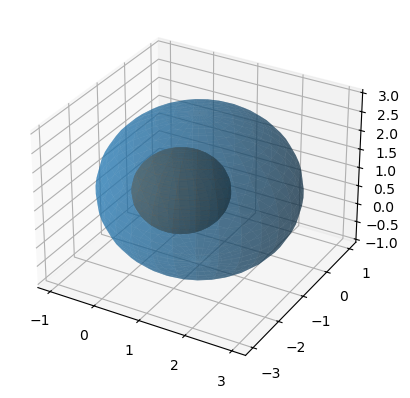

In [107]:
%matplotlib inline

E.plot(alpha=0.5)
S.plot()

In [108]:
%matplotlib qt5

fig = plt.figure(figsize=(10,10))
fig.suptitle("Example of affine spaces")
ax = fig.add_subplot(1,1,1, projection="3d")
ax.set_xlim(-3, 3), ax.set_ylim(-3, 3), ax.set_zlim(-3, 3)
ax.set_xlabel("x"), ax.set_ylabel("y"), ax.set_zlabel("z")

E.plot(ax, color="blue", alpha=0.3)
A1.plot(ax, alpha=0.5)
(E & A1).plot(ax, color="black")

## Polytopes: Cubes, Orthotopes, Zonotopes, Zonotope sections 

For a polytope $P$, $C$ a cube, an injective affine map $\phi$ and a surjective affine map $\psi$, we have:

$$P = \text{im }\phi \cap \psi(C)$$

--> Every objects of this type is a polytope.

Conditions on surjectivity and injectivity lead to zonotopes, orthotopes etc.

In [113]:
n, m = 3, 10

O1 = Orthotope([-1000,-1000,-1000], [2000,0,0])
# Let's create an orthotope O
t_min = 5*np.ones(m)
t_max = np.random.uniform(low=500, high=1500,size=m)
O = Orthotope(t_min, t_max)

# Now, project it randomly onto a subspace
N = np.random.uniform(-1, 1, size=(n, m))
Z = N @ O

# Let's create a polytope
# injection = AffineMap(np.array([[1,2,3], [1,1,1], [0,0,0]]))
# surjection = AffineMap(N)
# Pol = Polytope(injection, surjection)

In [112]:
%matplotlib qt5

fig = plt.figure(figsize=(10,10))
fig.suptitle("Example of affine spaces")
ax = fig.add_subplot(1,1,1, projection="3d")
a = 2000
ax.set_xlim(-a, a), ax.set_ylim(-a, a), ax.set_zlim(-a, a)
ax.set_xlabel("x"), ax.set_ylabel("y"), ax.set_zlabel("z")


(1000 * Cube(3)).plot(ax, tol=100, color="black", alpha=0.2, label="Cube 3D")
O1.plot(ax, tol=100, color="blue", alpha=0.2, label="Orthotope")
Z.plot(ax, tol=100, color="red", alpha=0.2, label="Zonotope")

# Pol.plot(ax, tol=10, color="red")
ax.legend()

Visual: no faces found, calculating faces
using provided 3d axis
Visual: no faces found, calculating faces
using provided 3d axis
Visual: no faces found, calculating faces
using provided 3d axis


NameError: name 'Pol' is not defined

In [89]:
print("O is a zonotope:", O.is_zonotope())
print("O is an orthotope:", O.is_orthotope())
print("O is a cube:", O.is_cube())

print()
print("Z is a zonotope:", Z.is_zonotope())
print("Z is an orthotope:", Z.is_orthotope())
print("Z is a cube:", Z.is_cube())

O is a zonotope: True
O is an orthotope: True
O is a cube: False

Z is a zonotope: True
Z is an orthotope: False
Z is a cube: False


## Operating on 